Relativistic thin-foil electrodynamics
---
Sergey Rykovanov

Primarily based on Bulanov et al, Phys. Plasmas 20, 123114 (2013)

We assume that a foil is delta-like. Ions are at the moment considered immobile and located at $x=0$. Laser pulse propagates from the left side $t-x$, everything is normalized in the usual relativistic laser-plasma way  ($e=1$, $m_e=1$, $c=1$, $\omega_L=1$). The model deals with the motion of the foil in the self-consistent way. Radiation from the foil itself is considered in the equations of motion. First, we start with the wave equation and its solutions in the case of the delta-foil.

$$\partial_{tt} \vec a - \partial_{xx} \vec a = -\alpha \delta(x-x_e(t)) \vec v\qquad (*)$$

where $x_e(t)$ is the position of 1D delta-electron, $\vec v$ - its velocity, $\alpha=n_e\, d$ is the areal density of the foil with $n_e$ - assumed density and $d$ assumed thickness (for comparison with PIC simulations).

Green function for the 1D wave equation is:

$$G(t,t',x,x')=\frac{1}{2}\Theta\left(t-t'-\left|x-x'\right| \right)\mathrm{,}$$
where $\Theta(x)$ is the Heaviside step function. Using this Green function it is easy to obtain radiation produced by the motion of the electron in 1D (Lienard-Wiechert potentials analogs):

1) observer is to the left of the foil (for transverse electric field components):

$$\vec E(t,x)=\alpha\frac{\vec{v}(t^*)}{1+v_x(t^*)}$$

It is convenient to write in components:

$$E_y(t,x)=-B_z(t,x)$$
$$E_z(t,x)=B_y(t,x)$$

2) observer is to the right of the foil

$$\vec E(t,x)=\alpha\frac{\vec{v}(t^*)}{1-v_x(t^*)}$$

$$E_y(t,x)=B_z(t,x)$$
$$E_z(t,x)=-B_y(t,x)$$

Remembering that there is a laser pulse coming from the left, and that force from self-radiation is equal to the average of fields on the both sides of the foil, the total field components can be written in the following way:

$$\epsilon\equiv\frac{\alpha}{2}$$
$$E_x=R(x)$$
$$E_y=E_{y,L}+\epsilon \frac{u_y}{\gamma}\gamma_x^2$$
$$E_z=E_{z,L}+\epsilon \frac{u_z}{\gamma}\gamma_x^2$$
$$B_x=0$$
$$B_y=-E_{z,L}-\epsilon \frac{u_x u_z}{\gamma^2}\gamma_x^2$$
$$B_z=E_{y,L}+\epsilon \frac{u_x u_y}{\gamma^2}\gamma_x^2$$

Here, $R(x)$ is the model for the restoring force of the ions, typically $R(x)=\epsilon\, \mathrm{sign}(x)$, $u$ - 4-momentum components, $\gamma_x=\frac{1}{\sqrt{1-v_x^2}}$. We can now construct the usual electromagnetic tensor and use relativistic mechanics to treat electron motion:

$$\frac{du^{\mu}}{d\tau}=-F^{\mu\nu}u_{\nu}\mathrm{,}$$
where $\tau$ is the proper time. We then get:

$$\frac{d\gamma}{d\tau}=-E_xu_x-E_{y,L}u_y-E_{z,L}u_z-\epsilon\frac{\gamma_x^2}{\gamma}\left(u_y^2+u_z^2 \right)$$
$$\frac{du_x}{d\tau}=-\gamma E_x-H_{z,L}u_y+H_{y,L}u_z-\epsilon\frac{u_x\gamma_x^2}{\gamma^2}\left(u_y^2+u_z^2 \right)$$
$$\frac{du_y}{d\tau}=-E_{y,L}\left(\gamma-u_x\right) - \epsilon u_y$$
$$\frac{du_z}{d\tau}=-E_{z,L}\left(\gamma-u_x\right) - \epsilon u_z$$


New variables:

$$\xi\equiv t-x$$
$$h\equiv\gamma-u_x$$
$$u_\perp\equiv u_y^2 + u_z^2$$

Then
$$\frac{d\xi}{d\tau}=h$$

$$u_x=\gamma-h=\frac{1+u_\perp^2-h^2}{2h}$$

After some manipulations we get:

$$\frac{dh}{d\xi}=E_x-\epsilon\frac{u_\perp^2}{1+u_\perp^2}$$
$$\frac{dx}{d\xi}=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$\frac{du_y}{d\xi}=-E_{y,L}-\epsilon \frac{u_y}{h}$$
$$\frac{du_z}{d\xi}=-E_{z,L}-\epsilon \frac{u_z}{h}$$

Noticing, that $\frac{u_y}{h}=\frac{dy}{d\xi}$, we get the following set of master equations:

$$h'=E_x-\epsilon \frac{u_\perp^2}{1+u_\perp^2}$$
$$x'=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$y'=\frac{u_y}{h}$$
$$z'=\frac{u_z}{h}$$
$$u_y=a_{y,L}-\epsilon y$$
$$u_z=a_{z,L}-\epsilon z$$

Below we solve these equations using RK4 method (`scipy.integrate.ode`)

Система дифференциальных ур-й
$$h'=\epsilon\left(\tanh\left(\frac{8x}{\theta}\right)-\frac{u_\perp^2}{1+u_\perp^2}\right)$$
$$x'=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$y'=\frac{u_y}{h}$$
$$z'=\frac{u_z}{h}$$

Вспомогательные ур-я:
$$u_y=a_{y,L}-\epsilon y$$
$$u_z=a_{z,L}-\epsilon z$$
$$u^2_\perp = u_y^2 + u_z^2$$
Здесь $a_{y,L}$ и $a_{z,L}$ заданные цуги

In [1]:
import math
from functools import partial
import scipy.integrate

import torch
from torch import nn, autograd, optim


%matplotlib notebook 
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from nets import *
from pdes import *
from utils import *
from graphics import *
from solutions import *

In [2]:
def D(y, x):
    grad = autograd.grad(
        outputs=y, inputs=x,
        grad_outputs=torch.ones_like(y),
        create_graph=True, allow_unused=True)

    if len(grad) == 1:
        return grad[0]
    return grad

## Solving simple SPDEs

$$\begin{align}
    \begin{pmatrix}
    \dot x\\ \dot y\\ \dot z
    \end{pmatrix}
    =
    \begin{pmatrix}
    x+2y+2z\\ 2x+y+2z\\ 2x+2y+z
    \end{pmatrix}
\end{align}$$

$$
\mathrm w(0) = \begin{pmatrix}2\\-1\\-1\end{pmatrix}
$$

In [3]:
N = 100
net = RNNLikeDGM(1,3, as_array=False)
opt = optim.Adam(net.parameters(), 1e-3)

calc_loss = lambda t,x,y,z: torch.norm(D(x,t)-(x+2*y+2*z))
rbc = torch.tensor([2., -1., -1.])

history = []
for _ in trange(200):
    opt.zero_grad()
        
    t = torch.rand(N)
    t.requires_grad_(True)
    x,y,z = net(t).unbind(1)
    abc = net(t.new([0.]))
    
    loss = (1./N*(calc_loss(t,x,y,z)
         + calc_loss(t,y,x,z)
         + calc_loss(t,z,x,y))
         + torch.norm(rbc - abc))
    
    history.append(loss.item())
    loss.backward()
    
    opt.step()

100%|██████████| 200/200 [00:05<00:00, 37.68it/s]


<IPython.core.display.Javascript object>


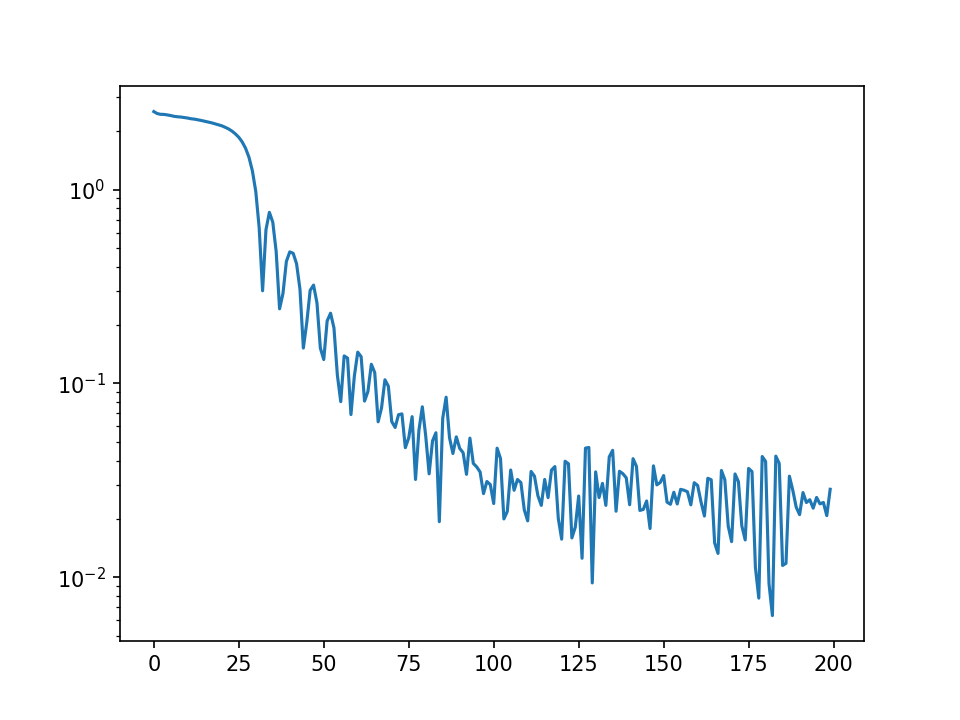

In [4]:
plt.figure()
plt.plot(history);
plt.yscale('log')

<IPython.core.display.Javascript object>


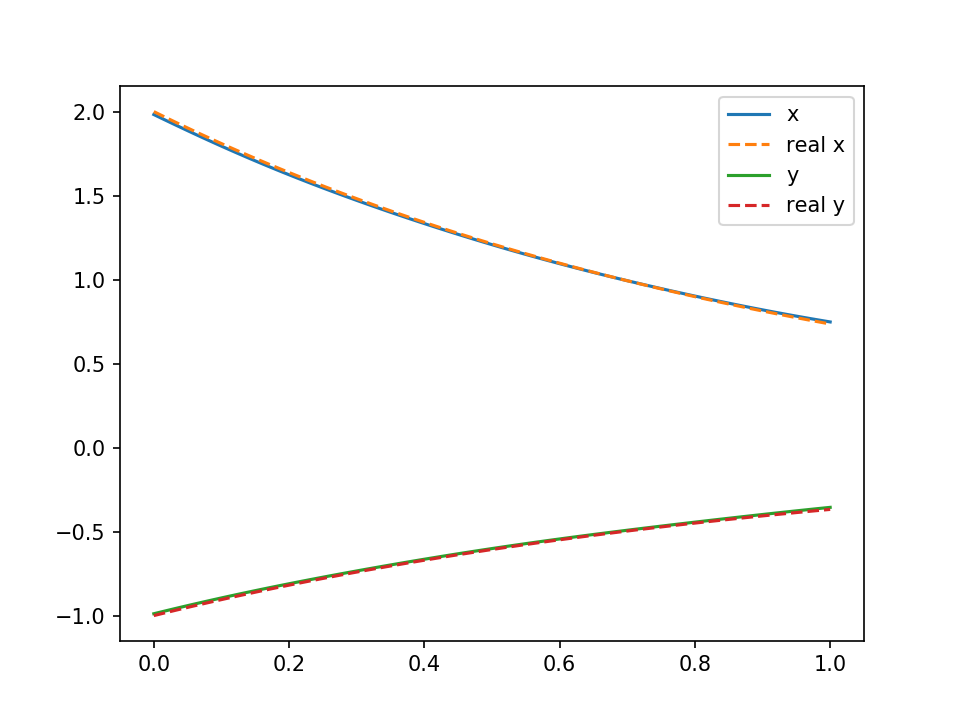

In [5]:
plt.figure()
t = torch.linspace(0, 1)

x = net(t)[:,0].detach()
rx = 2*torch.exp(-t)

y = net(t)[:,1].detach()
ry = -torch.exp(-t)

plt.plot(t, x, label='x');
plt.plot(t, rx, '--', label='real x');

plt.plot(t, y, label='y');
plt.plot(t, ry, '--', label='real y');
plt.legend();

$$\left\{\begin{align}
&\dot x = x-y^2\\
&\dot y = y\\
&\dot z = x+y^2+z\\
\end{align}\right.$$

$$
\mathrm w(0) = \begin{pmatrix}0\\1\\0\end{pmatrix}
$$

In [7]:
N = 100
net = RNNLikeDGM(1,3, growing=True, as_array=False)
opt = optim.Adam(net.parameters(), 1e-3)

rbc = torch.tensor([0., 1., 0.])
def calc_loss(t, x, y, z):
    out = (torch.norm(D(x,t) - (x-y**2))
           + torch.norm(D(y,t) - y)
           + torch.norm(D(z,t) - (x+y**2+z)))
    return out

history = []
for _ in trange(200):
    opt.zero_grad()
        
    t = torch.rand(N)
    t.requires_grad_(True)
    x,y,z = net(t).unbind(1)
    abc = net(t.new([0.]))
    
    loss = 1./N*calc_loss(t,x,y,z) + torch.norm(rbc - abc)
    history.append(loss.item())
    loss.backward()
    
    opt.step()

100%|██████████| 200/200 [00:05<00:00, 34.06it/s]


<IPython.core.display.Javascript object>


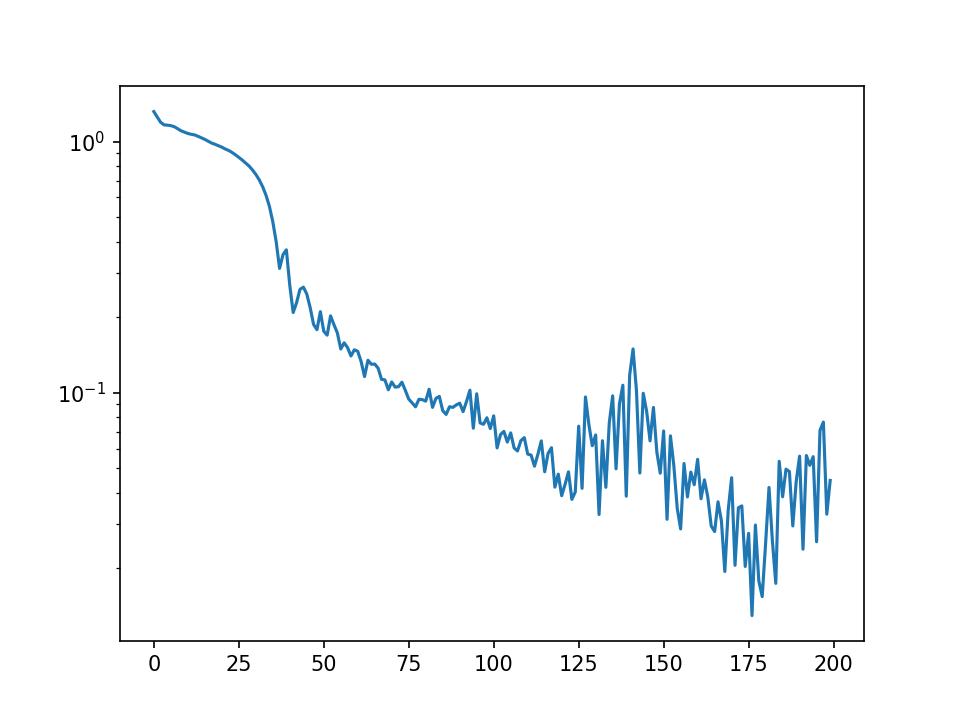

In [8]:
plt.figure()
plt.plot(history);
plt.yscale('log')

<IPython.core.display.Javascript object>


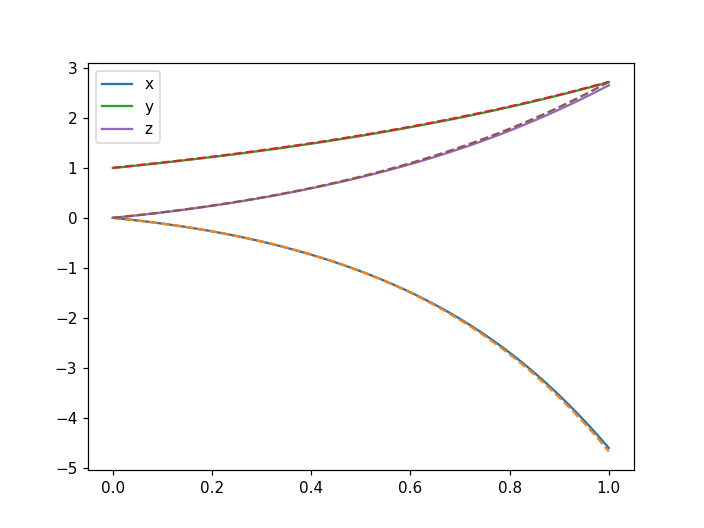

In [40]:
plt.figure()
t = torch.linspace(0, 1)

x = net(t)[:,0].detach()
rx = torch.exp(t) - torch.exp(2*t)

y = net(t)[:,1].detach()
ry = torch.exp(t)

z = net(t)[:,2].detach()
rz = t*torch.exp(t)

plt.plot(t, x, label='x');
plt.plot(t, rx, '--', label='real x');

plt.plot(t, y, label='y');
plt.plot(t, ry, '--', label='real y');

plt.plot(t, z, label='z');
plt.plot(t, rz, '--', label='real z');
plt.legend();

$$\left\{\begin{align}
&\dot x = -2x-y+37\sin t\\
&\dot y = -4x-5y\\
\end{align}\right.$$

$$
\mathrm w(0) = \begin{pmatrix}-5\\4\end{pmatrix}
$$

In [84]:
N = 200
net = RNNLikeDGM(1,2, as_array=False)
opt = optim.Adam(net.parameters(), 1e-3)

rbc = torch.tensor([-5., 4.])
def calc_loss(t, x, y, z):
    out = (torch.norm(D(x,t) - (-2*x-y+37*torch.sin(t)))
           + torch.norm(D(y,t) - (-4*x-5*y)))
    return out

history = []
for _ in trange(6000):
    opt.zero_grad()
        
    t = 10*torch.rand(N)
    t.requires_grad_(True)
    x,y = net(t).unbind(1)
    abc = net(t.new([0.]))
    
    loss = 1./N*calc_loss(t,x,y,z) + torch.norm(rbc - abc)
    history.append(loss.item())
    loss.backward()
    
    opt.step()

100%|██████████| 6000/6000 [02:54<00:00, 34.40it/s]


<IPython.core.display.Javascript object>


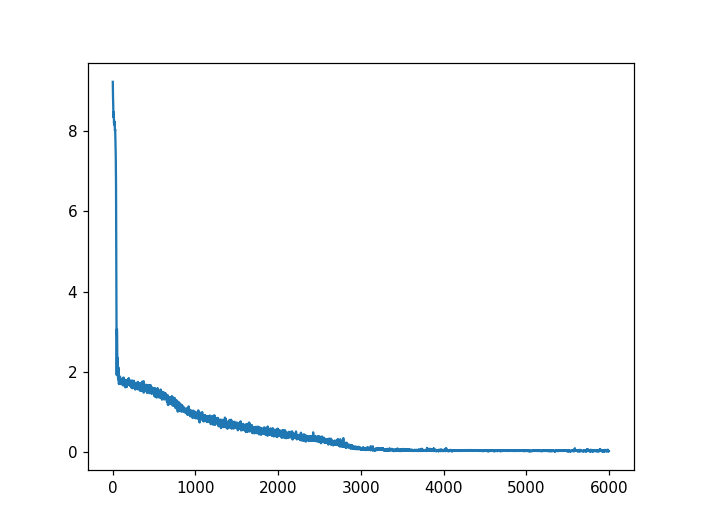

In [85]:
plt.figure()
plt.plot(history);

<IPython.core.display.Javascript object>


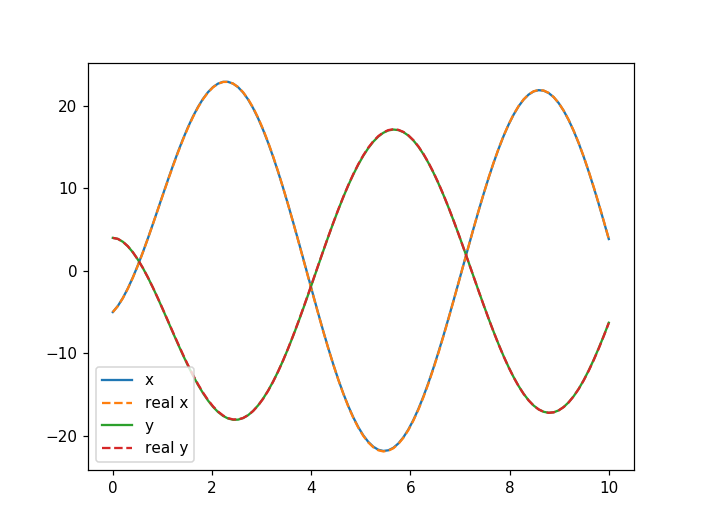

In [86]:
plt.figure()
t = 10*torch.linspace(0, 1)

x = net(t)[:,0].detach()
rx = 10*torch.exp(-t) + 16*torch.sin(t) - 15*torch.cos(t)
plt.plot(t, x, label='x');
plt.plot(t, rx, '--', label='real x');

y = net(t)[:,1].detach()
ry = -10*torch.exp(-t) - 10*torch.sin(t) + 14*torch.cos(t)
plt.plot(t, y, label='y');
plt.plot(t, ry, '--', label='real y');

plt.legend();

---

In [4]:
# --> Problem Setting
N = 500

a_0y = 20.
a_0z = 20.
xi_0y = 0.
xi_0z = .5*math.pi

tau = 10*math.pi
theta = .02*math.pi
eps = 200*theta

rbc = torch.tensor([0., 0., 0., 1.])
# <--

def pulse(x, a, phi):
    out = a * torch.sin(math.pi*x/tau)**2 * torch.sin(x-tau/2+phi)
    out[x>=tau] = 0
    out[x<0] = 0
    return out

In [2]:
class Base:
    def __init__(self):
        self.a = 10
        self.b = 'a'

In [3]:
class Child(Base):
    def __init__(self):
        super().__init__()
        del self.b

In [4]:
a = Child()

Система дифференциальных ур-й
$$h'=\epsilon\left(\tanh\left(\frac{8x}{\theta}\right)-\frac{u_\perp^2}{1+u_\perp^2}\right)$$
$$x'=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$y'=\frac{u_y}{h}$$
$$z'=\frac{u_z}{h}$$

Вспомогательные ур-я:
$$u_y=a_{y,L}-\epsilon y$$
$$u_z=a_{z,L}-\epsilon z$$
$$u^2_\perp = u_y^2 + u_z^2$$
Здесь $a_{y,L}$ и $a_{z,L}$ заданные цуги

In [5]:
# OPTION 1: ONE NET

def calc_loss(xi, x, y, z, h):
    a_y = pulse(xi, a_0y, xi_0y)
    a_z = pulse(xi, a_0z, xi_0z)

    u_y = a_y-eps*y
    u_z = a_z-eps*z
    u_ps = u_y**2 + u_z**2
    
    out = (torch.norm(2*D(x,xi)*h**2-(1+u_ps-h**2))
           + torch.norm(h*D(y,xi)-u_y)
           + torch.norm(h*D(z,xi)-u_z)
           + torch.norm(D(h,xi)-eps*(torch.tanh(8*x/theta)-u_ps/(1+u_ps))))
    return out

net = RNNLikeDGM(1,4,200,4, as_array=False)
opt = optim.Adam(net.parameters(), 1e-3)
sch = optim.lr_scheduler.StepLR(opt, 100, .97)
history = []

for _ in trange(500):
    opt.zero_grad()
        
    xi = math.pi*torch.rand(N)
    xi.requires_grad_(True)
    xyzh = net(xi).unbind(1)
    abc = net(xi.new([0.]))
    
    loss = 0.01/N*calc_loss(xi,*xyzh) + torch.norm(abc-rbc)
    history.append(loss.item())
    loss.backward()
    
    opt.step()
    sch.step()

100%|██████████| 500/500 [02:02<00:00,  4.08it/s]


In [6]:
xi = math.pi*torch.rand(N)
xi.requires_grad_(True)
xyzh = net(xi).unbind(1)
abc = net(xi.new([0.]))

print((1./N*calc_loss(xi,*xyzh)).item())
torch.norm(abc-rbc)

0.334646075963974


tensor(0.0043, grad_fn=<NormBackward0>)

0.02243673801422119


<IPython.core.display.Javascript object>


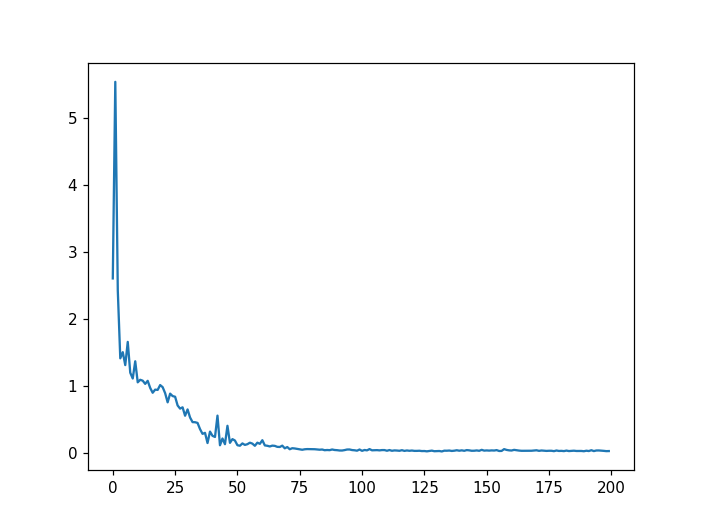

In [13]:
print(history[-1])
plt.figure()
plt.plot(history[:]);

In [4]:
diff_loss = [
    lambda out, xi, u_y, u_z, u_ps: torch.norm(
        D(out[-1], xi) - eps*(torch.tanh(8*out[0]/theta)-u_ps/(1+u_ps))),
    lambda out, xi, u_y, u_z, u_ps: torch.norm(
        D(out[0], xi) - .5*(1+u_ps-out[-1]**2)/out[-1]**2), 
    lambda out, xi, u_y, u_z, u_ps: torch.norm(
        D(out[1], xi) - u_y/out[-1]), 
    lambda out, xi, u_y, u_z, u_ps: torch.norm(
        D(out[2], xi) - u_z/out[-1])
]

bc_loss = [
   lambda bc: (bc - 0.)**2,
   lambda bc: (bc - 0.)**2,
   lambda bc: (bc - 0.)**2,
   lambda bc: (bc - 1.)**2,
]

In [52]:
nets = [RNNLikeDGM(1,1,200,4) for _ in range(4)]
opts = [optim.RMSprop(net.parameters(), lr=2e-3, weight_decay=1e-4) for net in nets]
schs = [optim.lr_scheduler.StepLR(opt, 60, gamma=.9) for opt in opts]
#schs = [optim.lr_scheduler.CosineAnnealingWarmRestarts(opt, 200, eta_min=1e-6) for opt in opts]

In [75]:
# OPTION 2: SEPARATE NETS

# out[0] -> x
# out[1] -> y
# out[2] -> z
# out[-1] -> h

for _ in trange(400):
    L = torch.Tensor(4)
    for i, opt in enumerate(opts):
        opt.zero_grad()
        
        xi = 20*math.pi*torch.rand(N)
        xi.requires_grad_(True)
        out = [net(xi) for net in nets]
        BC = nets[i](torch.tensor([0.]))

        a_y = pulse(xi, a_0y, xi_0y)
        a_z = pulse(xi, a_0z, xi_0z)

        u_y = a_y-eps*out[1]
        u_z = a_z-eps*out[2]
        u_ps = u_y**2 + u_z**2
        loss = 1./N*diff_loss[i](out, xi, u_y, u_z, u_ps) + bc_loss[i](BC)
        loss.backward()
        L[i] = loss.item()
        opt.step()
        
    history.append(L.sum())
        
#     for sch in schs:
#         sch.step()

100%|██████████| 400/400 [02:42<00:00,  2.46it/s]


In [39]:
main = ResNetLikeDGM(1,50,200, as_array=False)
nets = [RNNLikeDGM(50,1,200) for _ in range(4)]
opts = [optim.RMSprop(
    list(main.parameters())+list(net.parameters()),
    lr=1e-3, weight_decay=1e-4) for net in nets]
schs = [optim.lr_scheduler.StepLR(opt, 60, gamma=.9) for opt in opts]

history = []

In [40]:
# OPTION 3: MULTI-HEAD STRUCTURE

# out[0] -> x
# out[1] -> y
# out[2] -> z
# out[-1] -> h

for _ in trange(400):
    L = torch.Tensor(4)
    for i, opt in enumerate(opts):
        opt.zero_grad()
        
        xi = 20*math.pi*torch.rand(N)
        xi.requires_grad_(True)
        
        hi = main(xi)
        out = [net(hi) for net in nets]
        BC = nets[i](main(torch.tensor([0.])))

        a_y = pulse(xi, a_0y, xi_0y)
        a_z = pulse(xi, a_0z, xi_0z)

        u_y = a_y-eps*out[1]
        u_z = a_z-eps*out[2]
        u_ps = u_y**2 + u_z**2
        loss = (1./N*diff_loss[i](out, xi, u_y, u_z, u_ps)
                + bc_loss[i](BC))
        
        loss.backward()
        L[i] = loss.item()
        opt.step()
        
    history.append(L.sum())
        
#     for sch in schs:
#         sch.step()

100%|██████████| 400/400 [03:46<00:00,  1.77it/s]


In [41]:
for net in nets:
    print(net(main(torch.tensor([0.]))))

tensor([0.0044], grad_fn=<SqueezeBackward3>)
tensor([-0.0087], grad_fn=<SqueezeBackward3>)
tensor([-0.1430], grad_fn=<SqueezeBackward3>)
tensor([0.9198], grad_fn=<SqueezeBackward3>)


In [34]:
net(torch.tensor([0.]))

tensor([[-0.1592,  0.0358, -0.0340, -0.2510]], grad_fn=<SqueezeBackward3>)

In [26]:
print(max(diff_loss))
print(max(bc_loss))
print()
print(diff_loss[-1])
print(bc_loss[-1])

print(diff_loss[-1])
print(bc_loss[-1])

2302550.0
1.6203693151474

551.9913330078125
1.5931251049041748
551.9913330078125
1.5931251049041748


<IPython.core.display.Javascript object>


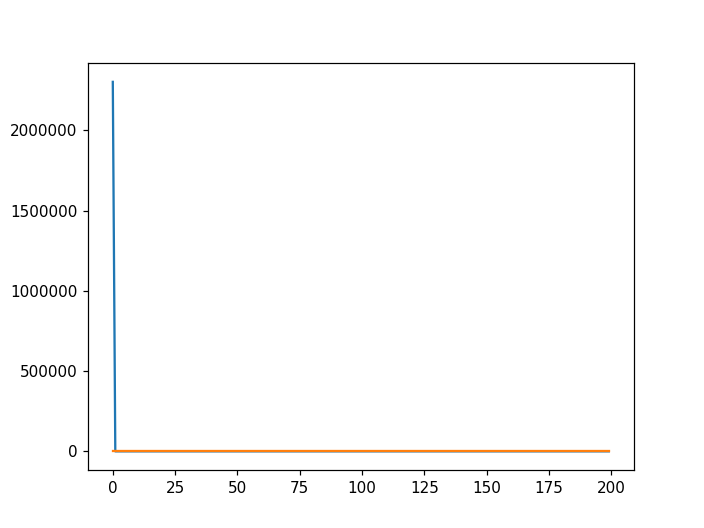

In [27]:
plt.figure()
plt.plot(diff_loss)
plt.plot(bc_loss)

tensor(0.2422)


<IPython.core.display.Javascript object>


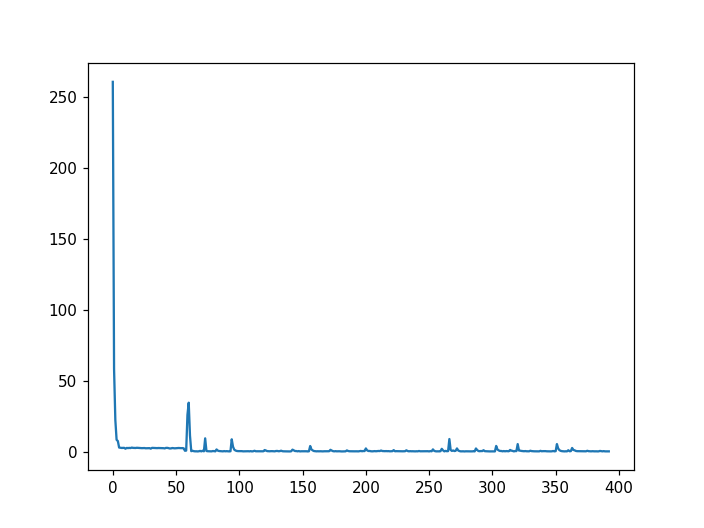

400


In [47]:
print(history[-1])
plt.figure()
print(len(history))
plt.plot(history[7:])

$a_{y,L}$ and $a_{y,L}$ are the solution projections of the homogeneous form of the equation $(*)$, that can be set as follows (like Sergey proposed it last time)

$$
    a_{y,L} = a_{0y}\exp\left(-\frac{\xi^2}{2\tau}\right)\sin(\xi + \xi_{0y})\\
    a_{z,L} = a_{0z}\exp\left(-\frac{\xi^2}{2\tau}\right)\sin(\xi + \xi_{0z})
$$

For numerical solution obtained with RK4, he uses $a$ of the following form:

$$
    a_{0y}\sin^2\frac{\pi\xi}{\tau}\;\sin(\xi-\frac{\tau}{2}+\xi_{0y})\\
    a_{0z}\sin^2\frac{\pi\xi}{\tau}\;\sin(\xi-\frac{\tau}{2}+\xi_{0z})
$$

for $\xi$ values: $0 \le \xi < \tau$ (for others it is 0)

In [25]:
### ---> Problem Setting
N = 10000

a_0y = 20.
a_0z = 20.
xi_0y = 0.
xi_0z = .5*math.pi
tau = 10*math.pi  # pulse duration

theta = .02*math.pi  # thickness
eps = 200*theta

rbc = torch.tensor([0., 0., 0., 1.])
### <---

def pulse_scalar(x, A, phi):
    if (x < 0) or (x>tau): return 0.
    return A*math.sin(math.pi*x/tau)**2 * math.sin(x-tau/2+phi)

Система дифференциальных ур-й
$$h'=\epsilon\left(\tanh\left(\frac{8x}{\theta}\right)-\frac{u_\perp^2}{1+u_\perp^2}\right)$$
$$x'=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$y'=\frac{u_y}{h}$$
$$z'=\frac{u_z}{h}$$

Вспомогательные ур-я:
$$u_y=a_{y,L}-\epsilon y$$
$$u_z=a_{z,L}-\epsilon z$$
$$u^2_\perp = u_y^2 + u_z^2$$
Здесь $a_{y,L}$ и $a_{z,L}$ заданные цуги

In [54]:
# for RK4, we assume:
# xi = t-x
# w[0] -> x(xi)
# w[1] -> y(xi)
# w[2] -> z(xi)
# w[3] -> h(xi)

# note the restoring field is smoothed using the tanh
def force_vector(xi, w):
    a_y = pulse_scalar(xi, a_0y, xi_0y)
    a_z = pulse_scalar(xi, a_0z, xi_0z)
    u_ps = (a_y-eps*w[1])**2+(a_z-eps*w[2])**2
    E = math.tanh(8*w[0]/theta)
    
    f0 = .5/w[-1]**2*(1+u_ps-w[-1]**2)
    f1 = 1./w[-1]*(a_y-eps*w[1])
    f2 = 1./w[-1]*(a_z-eps*w[2])
    f3 = eps*(E - u_ps/(1+u_ps))
    return [f0,f1,f2,f3]

w = np.array([0., 0., 0., 1.])
r=scipy.integrate.ode(force_vector, jac=None)
r.set_integrator('dopri5')
r.set_initial_value(w)

xi = [0.]
xi_end=20*math.pi
dxi=1e-3

while r.successful() and r.t < xi_end:
    r.integrate(r.t+dxi)
    w = np.vstack([w, r.y])
    xi = np.r_[xi, r.t]

<IPython.core.display.Javascript object>


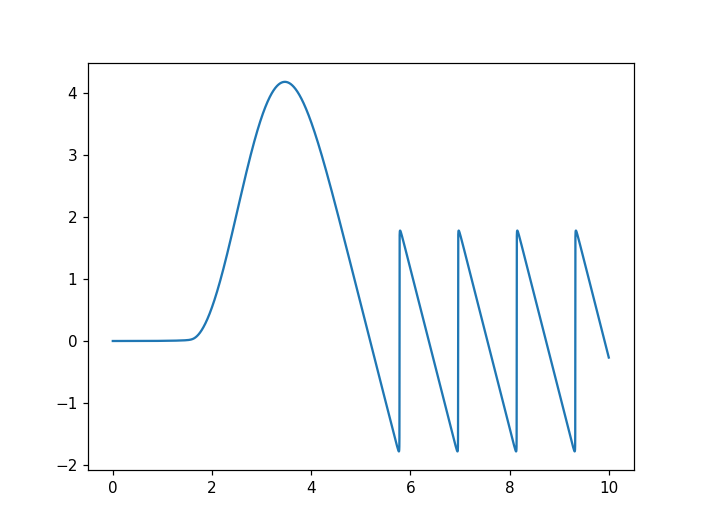

In [74]:
plt.figure()
plt.plot(xi/2/math.pi, w[:, 0])

<IPython.core.display.Javascript object>


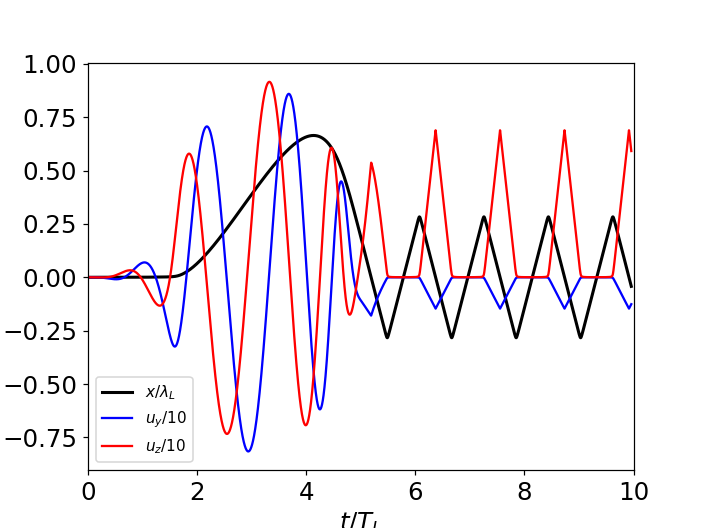

In [73]:
sw=1.

x,y,z,h = w.T
u_x=scipy.integrate.cumtrapz(x,xi)*h[1:]
u_y=scipy.integrate.cumtrapz(y,xi)*h[1:]
u_z=scipy.integrate.cumtrapz(z,xi)*h[1:]

plt.figure()
plt.plot(xi/2/math.pi+sw*x/2/math.pi, x/2/math.pi, 'k', lw=2, label='$x/\lambda_L$')
#plot(xi/2/pi+sw*x/2/pi, y/2/pi)
plt.plot(xi[1:]/2/math.pi+sw*x[1:]/2/math.pi, u_y/10, 'b', label='$u_y/10$')
plt.plot(xi[1:]/2/math.pi+sw*x[1:]/2/math.pi, u_z/10, 'r', label='$u_z/10$')
#plot(xi[1:]/2/pi+sw*x[1:]/2/pi, ux)
#plot(ux)
plt.xlim(0,10);
plt.legend();
plt.xlabel('$t/T_L$', fontsize=16);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

#plt.savefig('model_cp_atto.pdf', dpi=150)

In [69]:
sw=1.
xi = torch.arange(0, 20*math.pi, 1e-2)
x = nets[0](main(xi)).detach()

plt.figure()
plt.plot(xi/2/math.pi+sw*x/2/math.pi, x/2/math.pi, 'k', lw=2, label='$x/\lambda_L$')

NameError: name 'nets' is not defined

<IPython.core.display.Javascript object>


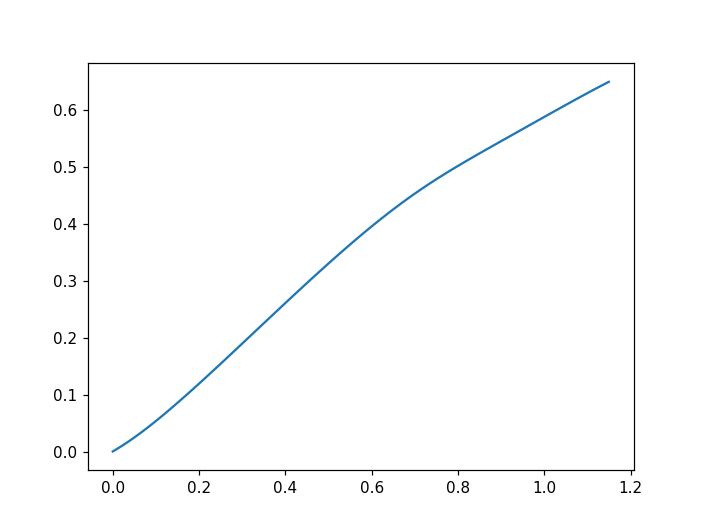

In [9]:
xi = torch.linspace(0, math.pi)
x = net(xi)[:, 0].detach()

plt.figure()
plt.plot(xi/2/math.pi+x/2/math.pi, x/2/math.pi)

<IPython.core.display.Javascript object>


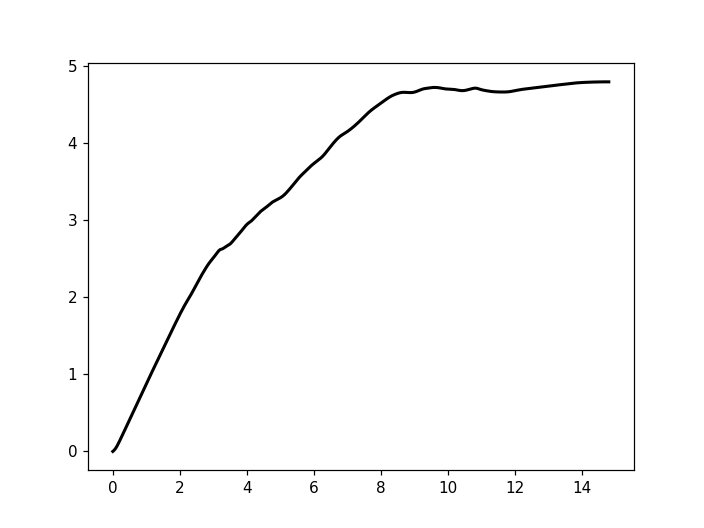

In [14]:
sw=1.
xi = torch.arange(0, 20*math.pi, 1e-2)
x = net(xi)[:, 0].detach()

plt.figure()
plt.plot(xi/2/math.pi+sw*x/2/math.pi, x/2/math.pi, 'k', lw=2, label='$x/\lambda_L$')

In [300]:
#!cp model_cp_atto.pdf /Users/sleepyhead/Desktop/

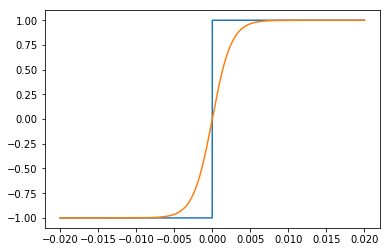

In [255]:
xx=linspace(-0.02*2*pi, 0.02*2*pi, 10000)

plot(xx/2/pi, sign(xx))
approx_sign = tanh(xx/(0.01/4*2*pi))

plot(xx/2/pi, approx_sign)